In [3]:
import scipy , numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import signal as sig
from scipy.integrate import simpson as simp

1 Definal uma variável com a informação da taxa de amostragem (srate)
2 Compute o intervalo (período) de amostragem (dt)

3 Obtenha o tempo total de registro

4 Crie um vetor de tempo, um etor que tenha o mesmo tamanho dos sinais e que cada entrada diga o tempo de registro pra a entrada correspondente nos sinais 

In [4]:
file = "LFP_HG_HFO.mat"

wav  = scipy.io.loadmat(file)

lfpHFO_2d = wav['lfpHFO']
lfpHG_2d = wav['lfpHG']

#Dimensão original era de 2D transformando para um array de 1d agora, antes era uma lista de uma lista agora somente uma lista 
lfpHFO = np.squeeze(lfpHFO_2d)
lfpHG = np.squeeze(lfpHG_2d)

print(f"Plotando LFP HFO -> {lfpHFO}")
print(f"Plotando LFP HG -> {lfpHG}")
#Taxa de amostragem srate 
srate = 1000.0 #Hz

print(f"\n\n Srate = {srate} ")

#Computando intervalo(período) amostragem (dt)
dt = 1.0 / srate  # (1 ms)

print(f"\n \n dt = {dt} segundos")

n_samples = len(lfpHFO)  # Número de amostras

time = np.arange(0, n_samples) * dt  # Tempo em segundos

print(f"\n\n Tempo em segundos {time}")

print(f"Tempo total {len(time) / 1000} segundos")


Plotando LFP HFO -> [-0.07958984 -0.05908203 -0.03564453 ...  0.11328125  0.12988281
  0.12353516]
Plotando LFP HG -> [-0.3203125  -0.31738281 -0.30712891 ...  0.16015625  0.16552734
  0.17041016]


 Srate = 1000.0 

 
 dt = 0.001 segundos


 Tempo em segundos [0.00000e+00 1.00000e-03 2.00000e-03 ... 2.99997e+02 2.99998e+02
 2.99999e+02]
Tempo total 300.0 segundos


5 Plote somultaneamente ambos os canais sem sobreposição, e que mostre o intervalo de 10 a 15 segundos 

6 Plote uma barra de calibragem indicando 0.5s (horizontal) e 0.5mV na vertical

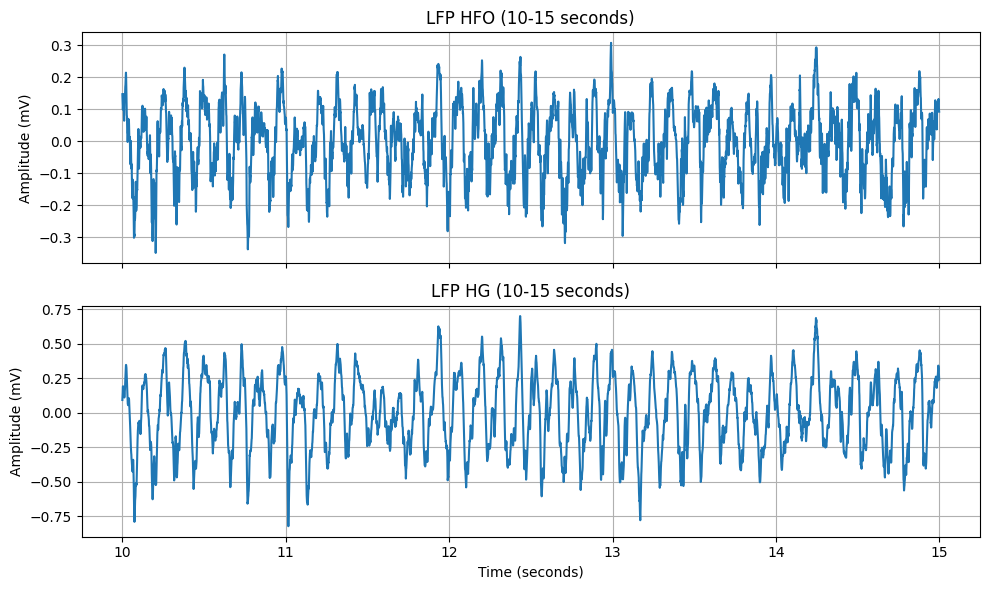

In [5]:
start_idx = int(10 * srate)  # 10 segundos
end_idx = int(15 * srate)  # 15 segundos

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.plot(time[start_idx:end_idx], lfpHFO[start_idx:end_idx])
ax1.set_ylabel('Amplitude (mV)')
ax1.set_title('LFP HFO (10-15 seconds)')
ax1.grid(True)

# Plot HG
ax2.plot(time[start_idx:end_idx], lfpHG[start_idx:end_idx])
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (mV)')
ax2.set_title('LFP HG (10-15 seconds)')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\n\n\n")

#partindo para a barra de calibragem 0.5 s horizontal e 0.5mV vertical



7) Compute a densidade espectral de potência (PSD) de cada canal usando o método do
Welch, com janelas de 2 segundos, 50% de sobreposição. Utilize o parâmetro nfft tal
que a resolução numérica de frequências seja no mínimo 0.1 Hz.


8) Crie 3 subplots; nos 2 primeiros subplots, plote separadamente a PSD de cada canal
(i.e., uma PSD em cada subplot). No terceiro subplot, plote as duas PSDs juntas. Para
todos os subplots, utilize como limite do eixo X o intervalo de 0 a 20 Hz. Use
“Frequency (Hz)” como título do eixo X, e “Power” como título do eixo Y. Para os dois
primeiros subplots, ponha o nome do canal como título do gráfico. Para o terceiro
subplot, crie uma legenda indicando a cor correspondente de cada canal.


9) Compute a potência média na banda teta (5-10 Hz) para cada canal

### Explicação dos parâmetros

nperseg = Tamanho da janela em amostras 

$$  nperseg = fs \cdot 2 = 1000 \cdot 2 = 2000$$

N_overlap é a sobreposição em amostras 

$$ noverlap = 0.5 \cdot nperseg = 1000 amostras $$

nfft é o tamanho da FFT para a resolução de frequência 

$$ \delta f = \frac{fs}{nfft} $$ 

$$ nfft \geqslant \frac{fs}{0.1} = \frac{1000}{0.1} = 10000 $$

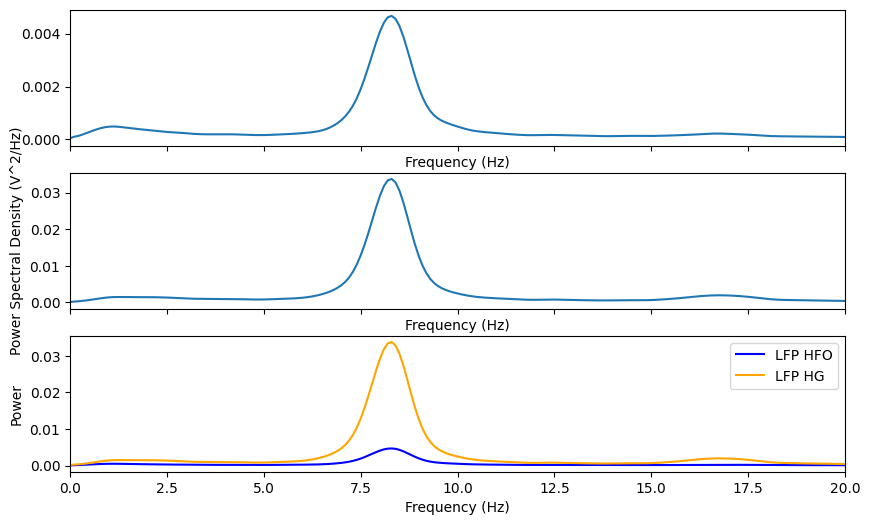



Mostrando os valores da potência theta  para lfpHFO [0.37189305 0.37933091 0.38676877 0.39420663 0.40164449 0.40908235
 0.41652021 0.42395808 0.43139594 0.4388338  0.44627166 0.45370952
 0.46114738 0.46858524 0.4760231  0.48346096 0.49089882 0.49833669
 0.50577455 0.51321241 0.52065027 0.52808813 0.53552599 0.54296385
 0.55040171 0.55783957 0.56527743 0.5727153  0.58015316 0.58759102
 0.59502888 0.60246674 0.6099046  0.61734246 0.62478032 0.63221818
 0.63965604 0.64709391 0.65453177 0.66196963 0.66940749 0.67684535
 0.68428321 0.69172107 0.69915893 0.70659679 0.71403465 0.72147251
 0.72891038 0.73634824 0.7437861 ] , tamanho 51


Mostrando o somatório da potência theta para lfpHFO 28.44981824580396


Mostrando a média aritmética do valor da banda theta para lfpHFO 0.5578395734471365


Mostrando o somatório da potência theta para lfpHG 192.83872422214947


Mostrando a média aritmética do valor da banda theta para lfpHG 3.781151455336264


In [6]:
#Computando o PSD usando o método de Welch

f_lfpHFO , Pxx_lfpHFO = sig.welch(
                    lfpHFO, 
                    fs=srate, 
                    nfft=10000, 
                    nperseg=2000 , 
                    noverlap=1000,
                    scaling='density') 

f_lfpHG , Pxx_lfpHG = sig.welch(
                    lfpHG, 
                    fs=srate, 
                    nfft=10000, 
                    nperseg=2000 , 
                    noverlap=1000,
                    scaling='density')

fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)



ax[0].plot(f_lfpHFO, Pxx_lfpHFO )
ax[0].set_xlabel('Frequency (Hz)')
#ax[0].set_ylabel('Power Spectral Density (V^2/Hz)')
ax[0].set_xlim(0, 20)

ax[1].plot(f_lfpHG, Pxx_lfpHG)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power Spectral Density (V^2/Hz)')
ax[1].set_xlim(0, 20)

#plotar as duas juntas agora 
ax[2].plot(f_lfpHFO, Pxx_lfpHFO, label='LFP HFO', color='blue')
ax[2].plot(f_lfpHG, Pxx_lfpHG, label='LFP HG', color='orange')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')
ax[2].set_xlim(0, 20)
ax[2].legend()  # Add a legend to distinguish the two signals

plt.show()



### Computando a potência média na banda theta (5-10Hz) para cada canal

fa = 5 
fb = 10

idx_theta_lfpHFO = np.where((f_lfpHFO >= fa) & (f_lfpHFO <= fb))[0] 

idx_theta_lfpHG = np.where( (f_lfpHG >= fa) & (f_lfpHG <= fb))[0]

theta_lfpHG = simp(Pxx_lfpHG[idx_theta_lfpHG] , dx=f_lfpHG[idx_theta_lfpHG])

theta_lfpHFO = simp(Pxx_lfpHFO[idx_theta_lfpHFO] , dx=f_lfpHFO[idx_theta_lfpHFO])
theta2_lfpHFO = sum(theta_lfpHFO)
print(f"\n\nMostrando os valores da potência theta  para lfpHFO {theta_lfpHFO} , tamanho {len(theta_lfpHFO)}")

print(f"\n\nMostrando o somatório da potência theta para lfpHFO {theta2_lfpHFO}")

print(f"\n\nMostrando a média aritmética do valor da banda theta para lfpHFO {theta2_lfpHFO/len(theta_lfpHFO)}")


#print(f"\n\nMostrando os valores da potência theta  para lfpHFO {theta_lfpHG} , tamanho {len(theta_lfpHG)}")

print(f"\n\nMostrando o somatório da potência theta para lfpHG {sum(theta_lfpHG)}")

print(f"\n\nMostrando a média aritmética do valor da banda theta para lfpHG {sum(theta_lfpHG)/len(theta_lfpHG)}")


10) Plote um gráfico de barras com os valores de potência média de teta de cada canal.
Utilize “Theta power” como título do eixo Y. No eixo X, indique com um label qual
canal é o lfpHG e qual canal é o lfpHFO (dica: use set(gca,’xticklabel’,variavelcelula),
onde variavelcelula é uma variável do tipo célula de duas entradas, cada uma com uma
string ou vetores de caracteres).


11) Crie dois subplots. No primeiro, plote as duas PSDs juntas em escala normal, com
limite do eixo X de 0 a 200 Hz. No segundo, plote novamente as duas PSDs, mas dessa
vez em escala logarítmica para o eixo Y

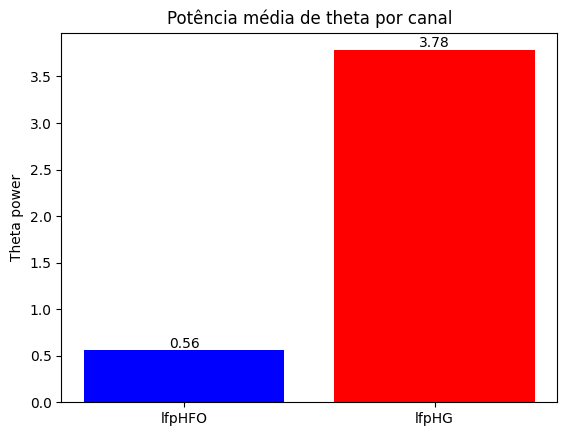

[]

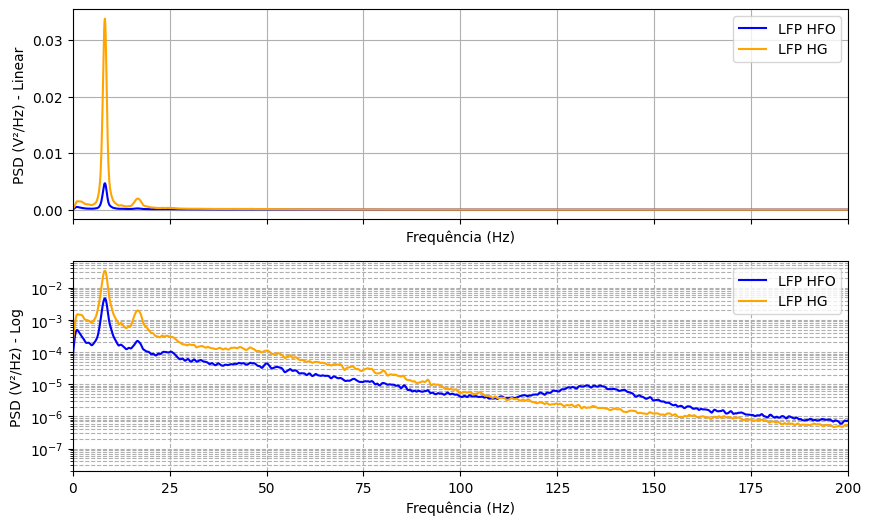

In [7]:
#plotando os gráficos barra 

fig , ax = plt.subplots()

media_lfpHFO = theta2_lfpHFO/len(theta_lfpHFO)
media_lfpHG = sum(theta_lfpHG)/len(theta_lfpHG)

canais = ['lfpHFO' , 'lfpHG']

power = [media_lfpHFO , media_lfpHG]

bars = ax.bar(canais , power , color=['blue' , 'red'])

ax.set_ylabel('Theta power')
ax.set_title('Potência média de theta por canal')

for bar in bars:
    alt = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,alt,
            f'{alt:.2f}',
            ha='center' , va='bottom')
    
plt.show()




fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax[0].plot(f_lfpHFO, Pxx_lfpHFO, label='LFP HFO', color='blue')
ax[0].plot(f_lfpHG, Pxx_lfpHG, label='LFP HG', color='orange')
ax[0].set_ylabel('PSD (V²/Hz) - Linear')
ax[0].set_xlabel('Frequência (Hz)')
ax[0].set_xlim(0, 200)
ax[0].grid(True)
ax[0].legend()

ax[1].plot(f_lfpHFO, Pxx_lfpHFO, label='LFP HFO', color='blue')
ax[1].plot(f_lfpHG, Pxx_lfpHG, label='LFP HG', color='orange')
ax[1].set_ylabel('PSD (V²/Hz) - Log')
ax[1].set_xlabel('Frequência (Hz)')
ax[1].set_xlim(0, 200)
ax[1].set_yscale('log')  # Escala log no eixo Y
ax[1].grid(True, which="both", ls="--")  
ax[1].legend()
plt.plot()

12) Obtenha novamente a PSD para o sinal lfpHG, mas dessa vez informando, ao invés do
parâmetro nfft, o vetor de frequências de 0 a 15 Hz em passos (step) de 0.01 Hz (i.e, F
= 0:0.01:15). Ainda, utilize dois tamanhos de janelas diferentes (isto é, compute 2
PSDs): (a) todo o sinal (i.e., window = length(lfpHG)) e (b) 1 segundo. Plote as duas
PSDs num mesmo gráfico. Utilize uma largura de linha (linewidth) de 4 pts para o PSD
obtido com janelas de 1 segundo.


13) Faça como no exercício anterior, mas utilizando o sinal lfpHFO e vetor de frequências
de 100 a 150 Hz (i.e., F=100:0.01:150).

[]

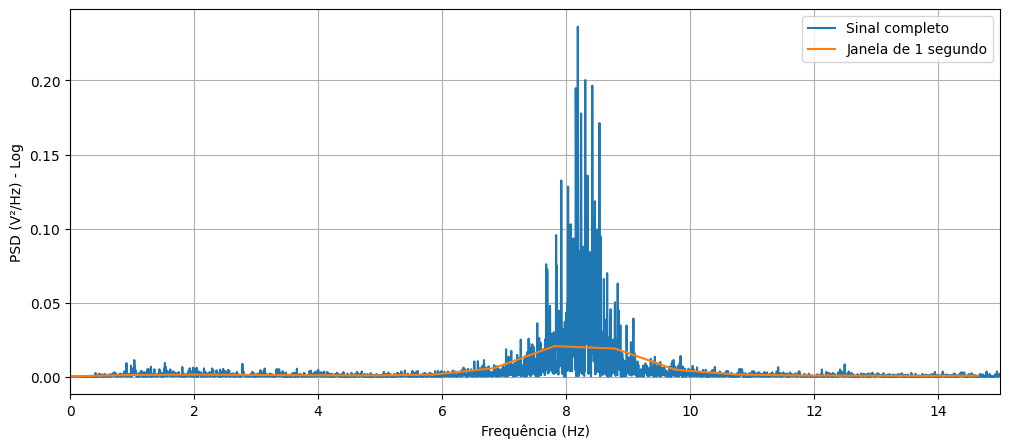

In [12]:
f_lfpHFG , Pxx_lfpHG = sig.welch( 
                              lfpHG,
                              fs=srate,
                              window='hann',
                              nfft=len(lfpHG),
                              nperseg=len(lfpHG),
                              noverlap=0,     
                              scaling='density'
                                   )

l1_sec , Pxx_1sec = sig.welch(
     lfpHG,
     fs=srate,
     window='hann',
     nperseg=srate,
     noverlap=srate//2,
     nfft=2**int(np.ceil(np.log2(srate))),
     scaling='density',
)

fa = 0
fb = 15

range_psd = np.where( (f_lfpHFG >= fa) & (f_lfpHFG <= 15))[0]
f_lfpHFG_full = f_lfpHFG[range_psd]
Pxx_full = Pxx_lfpHG[range_psd]

range_psd_1sec = np.where( (l1_sec >= 0) & (l1_sec <= 15))[0]
f_lfpHG_1s = l1_sec[range_psd_1sec]
Pxx_1sec = Pxx_1sec[range_psd_1sec]

fig , ax = plt.subplots(1 , 1 , figsize=(12,5))

ax.plot(f_lfpHFG_full , Pxx_full , label='Sinal completo')
ax.plot(f_lfpHG_1s , Pxx_1sec , label='Janela de 1 segundo')
ax.set_ylabel('PSD (V²/Hz) - Log')
ax.set_xlabel('Frequência (Hz)')
ax.set_xlim(0, 15)
ax.legend() 
plt.grid(True)
plt.plot()

[]

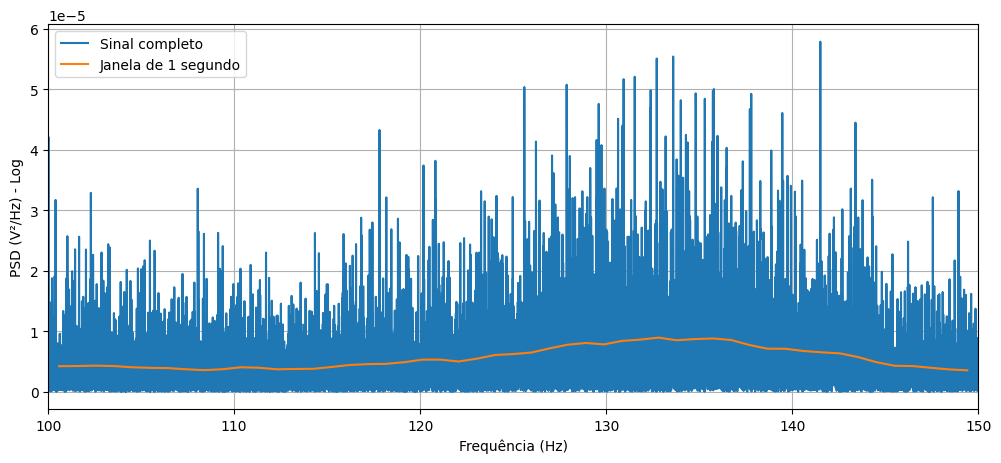

In [14]:
f_HFO , Pxx_lfpHFO = sig.welch(
    lfpHFO,
    fs=srate,
    window='hann',
    nfft=len(lfpHFO),
    nperseg=len(lfpHFO),
    noverlap=0,
    scaling='density'
)

l1_sec_hfo , Pxx_lHFO = sig.welch(
    lfpHFO,
    fs=srate,
    window='hann',
    nperseg=srate,
    noverlap=srate//2,
    nfft=2**int(np.ceil(np.log2(srate))),
    scaling='density'
)

fa = 100 
fb = 150 

range_hfo = np.where( (f_HFO >= fa) & (f_HFO <= fb))[0]
range_hfo_1 = np.where( (l1_sec_hfo >= fa) & (l1_sec_hfo <= fb))[0]

f_hfo_full = f_HFO[range_hfo]
f_hfo_1s = l1_sec_hfo[range_hfo_1]

Pxx_hfo_full = Pxx_lfpHFO[range_hfo]
Pxx_hfo_1s = Pxx_lHFO[range_hfo_1]

fig , ax = plt.subplots(1 , 1 , figsize=(12,5))

ax.plot(f_hfo_full , Pxx_hfo_full , label='Sinal completo')
ax.plot(f_hfo_1s , Pxx_hfo_1s , label='Janela de 1 segundo')
ax.set_ylabel('PSD (V²/Hz) - Log')
ax.set_xlabel('Frequência (Hz)')
ax.set_xlim(100,150 )
ax.legend() 
plt.grid(True)
plt.plot()
